In [1]:
# importar las librerias necesarias
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# only colab environment
#from google.colab import drive  
#drive.mount('/content/drive')
# v_path = '/content/drive/MyDrive/RL_DIC/BENCHMARK/' 

v_path = '' # local environment

# Analisis del portfolio

In [3]:
# en este notebook se mostraran las curvas de capital en el periodo seleccionado, de cada una de las estrategias del portfolio; asi como la curva global del portfolio y sus ratios.

In [4]:
# DEFINIMOS EL PERIODO DE BACKTEST
init_date = '2018-01-01'
end_date = '2023-01-01'

In [5]:
# leemos el portfolio
df_portfolio = pd.read_csv('df_portfolio_benchmark.csv')
df_portfolio.drop(columns=['Unnamed: 0'], inplace=True)
df_portfolio

,market,timeframe,system_type,in_condition_1,in_condition_2,out_condition_1,out_condition_2,n_trades_long_bkt,profit_factor_long_bkt,bmo_long_bkt,net_profit_long_bkt,n_trades_short_bkt,profit_factor_short_bkt,bmo_short_bkt,net_profit_short_bkt
0,NQ,15min,trend_short,2_bars_down,close < (close.shift(2) - 2.8 * atr_23),close > sma_200,close > (close.shift(2) + 2 * atr_92),573,1.418019,188.830716,108200.0,51,1.698507,390.000000,19890.0
1,NQ,5min,trend_short,3_bars_down,close < (close.shift(2) - 2.8 * atr_14),close > (close.shift(2) + 1.4 * atr_14),close > (close.shift(2) + 2.8 * atr_92),559,1.482666,148.193202,82840.0,50,1.897814,365.500000,18275.0
2,ES,10min,trend_long,close > (close.shift(2) + 2 * atr_14),close > (close.shift(2) + 2.8 * atr_138),close < (close.shift(2) - 2 * atr_276),close < (close.shift(2) - 2.8 * atr_23),504,1.412893,135.664683,68375.0,49,1.834465,407.653061,19975.0
3,ES,15min,trend_long,2_bars_up,close > (close.shift(2) + 2.8 * atr_92),close < sma_200,close < (close.shift(2) - 2 * atr_276),501,1.545865,141.641717,70962.5,59,1.695652,271.186441,16000.0
4,YM,10min,trend_long,close > sma_120,close > (close.shift(2) + 2.8 * atr_276),close < sma_200,close < (close.shift(2) - 2 * atr_138),587,1.411334,91.873935,53930.0,62,1.626443,183.790323,11395.0
5,YM,15min,trend_long,2_bars_up,close > (close.shift(2) + 2.8 * atr_92),close < sma_200,close < (close.shift(2) - 2 * atr_276),546,1.472367,100.109890,54660.0,55,1.919438,243.818182,13410.0
6,YM,15min,trend_short,close < ema_12,close < (close.shift(2) - 2.8 * atr_23),close > sma_60,close > (close.shift(2) + 1.4 * atr_92),595,1.407323,87.126050,51840.0,49,1.622726,171.122449,8385.0
7,NG,10min,trend_long,3_bars_up,close > (close.shift(2) + 2.8 * atr_276),close < min_200,close < sma_120,508,1.496451,117.027559,59450.0,41,1.820547,453.902439,18610.0
8,NG,10min,trend_short,close < sma_60,close < (close.shift(2) - 2.8 * atr_138),close > max_6,close > (close.shift(2) + 2 * atr_138),813,1.428588,89.876999,73070.0,71,2.370724,586.901408,41670.0
9,NG,15min,trend_long,2_bars_up,close > (close.shift(2) + 2.8 * atr_92),close < sma_60,close < (close.shift(2) - 2.8 * atr_138),661,1.465162,100.090772,66160.0,49,2.416885,551.428571,27020.0


In [6]:
# leemos el portfolio
df_portfolio = pd.read_csv('df_portfolio_conditions.csv')
df_portfolio.drop(columns=['Unnamed: 0'], inplace=True)
df_portfolio

,market,timeframe,system_type,in_condition_1,in_condition_2,out_condition_1,out_condition_2,n_trades_long_bkt,profit_factor_long_bkt,bmo_long_bkt,net_profit_long_bkt,n_trades_short_bkt,profit_factor_short_bkt,bmo_short_bkt,net_profit_short_bkt
0,NQ,15min,trend_short,b_condition_2,b_condition_24,a_condition_12,a_condition_18,573,1.418019,188.830716,108200.0,51,1.698507,390.000000,19890.0
1,NQ,5min,trend_short,b_condition_1,b_condition_23,a_condition_13,a_condition_25,559,1.482666,148.193202,82840.0,50,1.897814,365.500000,18275.0
2,ES,10min,trend_long,a_condition_14,a_condition_26,b_condition_22,b_condition_24,504,1.412893,135.664683,68375.0,49,1.834465,407.653061,19975.0
3,ES,15min,trend_long,a_condition_2,a_condition_25,b_condition_12,b_condition_22,501,1.545865,141.641717,70962.5,59,1.695652,271.186441,16000.0
4,YM,10min,trend_long,a_condition_11,a_condition_27,b_condition_12,b_condition_20,587,1.411334,91.873935,53930.0,62,1.626443,183.790323,11395.0
5,YM,15min,trend_long,a_condition_2,a_condition_25,b_condition_12,b_condition_22,546,1.472367,100.109890,54660.0,55,1.919438,243.818182,13410.0
6,YM,15min,trend_short,b_condition_8,b_condition_24,a_condition_10,a_condition_17,595,1.407323,87.126050,51840.0,49,1.622726,171.122449,8385.0
7,NG,10min,trend_long,a_condition_1,a_condition_27,b_condition_6,b_condition_11,508,1.496451,117.027559,59450.0,41,1.820547,453.902439,18610.0
8,NG,10min,trend_short,b_condition_10,b_condition_26,a_condition_4,a_condition_20,813,1.428588,89.876999,73070.0,71,2.370724,586.901408,41670.0
9,NG,15min,trend_long,a_condition_2,a_condition_25,b_condition_10,b_condition_26,661,1.465162,100.090772,66160.0,49,2.416885,551.428571,27020.0


In [7]:
# definimos un df para almacenar los valores de point_value para cada market
point_value_df = pd.DataFrame({'market': ['NQ', 'ES', 'YM', 'CL', 'NG', 'GC', 'VX', 'TY', 'MBT', 'MET' ], 'point_value': [20, 50, 5, 1000, 10000, 100, 1000, 1000, 0.1, 0.1]})
point_value_df


,market,point_value
0,NQ,20.0
1,ES,50.0
2,YM,5.0
3,CL,1000.0
4,NG,10000.0
5,GC,100.0
6,VX,1000.0
7,TY,1000.0
8,MBT,0.1
9,MET,0.1


In [8]:
def get_ohlcv_data(market, timeframe, init_date, end_date):
    """
    Genera df ohlcv para un determinado mercado y un determinado timeframe y periodo de tiempo
    """
    
    data = pd.read_pickle(v_path + market + '.pkl') # leemos el pkl del activo
    data['date'] = pd.to_datetime(data['Date']+ ' ' + data['Time'], format="%m/%d/%Y %H:%M") # definimos la columna date con Date y Time y la ponemos como indice
    data = data.set_index('date')
    data = data.drop(['Time'], axis=1)
    data = data.iloc[:,[1,2,3,4,5,6]]  # seleccionamos las columnas que queremos
    data.columns = ['open','high','low','close','up','down']  # renombramos las columnas
    data = data.loc[init_date:end_date] # seleccionamos el el rango de fechas que queremos

    # hacemos "resample" al timeframe seleccionado
    data = data.resample(timeframe).agg({'open':'first','high':'max','low':'min','close':'last','up':'sum','down':'sum'})
    df_data = data.dropna()  # eliminamos los NaN
    return df_data

In [9]:
# INDICATORS

def df_indicators_gen(df_data):
    """
    Esta funcion recibe un df con los datos ohlcv para un determinado activo-timeframe-periodo
    Se definen diferentes indicadores y patrones (de momentum, medias moviles, canales, breakout, volatilidad...), cada uno de ellos con parametros fijos.
    Los calculos son vectorizados
    La salida de la funcion es el df con los indicadores anadidos como columnas
    """
    df = df_data.copy()

    # ema/sma (6, 12, 26, 60, 120, 200)
    df['ema_6'] = df['close'].ewm(span=6, min_periods=1, adjust=False).mean()
    df['ema_12'] = df['close'].ewm(span=12, min_periods=1, adjust=False).mean()
    df['ema_26'] = df['close'].ewm(span=26, min_periods=1, adjust=False).mean()
    df['sma_60'] = df['close'].rolling(window=60, min_periods=1).mean()
    df['sma_120'] = df['close'].rolling(window=120, min_periods=1).mean()
    df['sma_200'] = df['close'].rolling(window=200, min_periods=1).mean()

    # atr (14, + atr diario de 5min, 10 min, 15mi y 1h)
    df['atr_14'] = np.max(pd.concat([df['high'] - df['low'], np.abs(df['high'] - df['close'].shift()), np.abs(df['low'] - df['close'].shift())], axis=1), axis=1).rolling(14).sum()/14
    df['atr_23'] = np.max(pd.concat([df['high'] - df['low'], np.abs(df['high'] - df['close'].shift()), np.abs(df['low'] - df['close'].shift())], axis=1), axis=1).rolling(23).sum()/23
    df['atr_92'] = np.max(pd.concat([df['high'] - df['low'], np.abs(df['high'] - df['close'].shift()), np.abs(df['low'] - df['close'].shift())], axis=1), axis=1).rolling(92).sum()/92
    df['atr_138'] = np.max(pd.concat([df['high'] - df['low'], np.abs(df['high'] - df['close'].shift()), np.abs(df['low'] - df['close'].shift())], axis=1), axis=1).rolling(138).sum()/138
    df['atr_276'] = np.max(pd.concat([df['high'] - df['low'], np.abs(df['high'] - df['close'].shift()), np.abs(df['low'] - df['close'].shift())], axis=1), axis=1).rolling(276).sum()/276

    # minimo/maximo (6, 14, 200)
    df['min_6'] = df['close'].rolling(window=6, min_periods=1).min()
    df['max_6'] = df['close'].rolling(window=6, min_periods=1).max()
    df['min_14'] = df['close'].rolling(window=14, min_periods=1).min()
    df['max_14'] = df['close'].rolling(window=14, min_periods=1).max()
    df['min_200'] = df['close'].rolling(window=200, min_periods=1).min()
    df['max_200'] = df['close'].rolling(window=200, min_periods=1).max()

    # n_bars_up/down (2, 3)
    df['2_bars_up'] = (df['close'] > df['open']) & (df['close'].shift() > df['open'].shift())
    df['2_bars_down'] = (df['close'] < df['open']) & (df['close'].shift() < df['open'].shift())
    df['3_bars_up'] = (df['close'] > df['open']) & (df['close'].shift() > df['open'].shift()) & (df['close'].shift(2) > df['open'].shift(2))
    df['3_bars_down'] = (df['close'] < df['open']) & (df['close'].shift() < df['open'].shift()) & (df['close'].shift(2) < df['open'].shift(2))

    # bollinger_bands (20-2)
    df['bb_upband_20__2'] = df['close'].rolling(20).mean() + (df['close'].rolling(20).std() * 2)
    df['bb_lowband_20__2'] = df['close'].rolling(20).mean() - (df['close'].rolling(20).std() * 2)

    df_indicators = df.dropna() # quitamos las primeras filas, en las que no ha habido suficientes barras para el calculo de los indicadores
    return df_indicators

In [10]:
# CONDITIONS

def df_conditions_gen(df_indicators):
    """
    Esta funcion recibe el df con los indicadores generados anteriormente, con ello definiremos una serie de condiciones o reglas que se usaran para construir los sistemas de trading.
    Se definen 2 sets de condiciones que representan si estamos por encima o por debajo de un canal de precios variable segun el indicador
    Segun el tipo de sistema (tendencial o reversion), como veremos, las condiciones seran entradas o salidas a mercado
    Los dataframes generados tendran como columnas las condiciones, que seran True o False, segun se cumplan o no en cada barra
    """

    df_above_conditions = df_indicators.iloc[:, [0,1,2,3,4,5]] 
    df_below_conditions = df_indicators.iloc[:, [0,1,2,3,4,5]]

    # inicialmente definimos las condiciones con respecto al cierre de la barra: close
    # probar lo mismo con respecto al "typical value", que es mas representativo de la barra que el close: typical_value= (high+low+close)/3 (o weighted= (high+low+2*close)/4)

    # definimos condiciones simples:
    df_above_conditions['a_condition_1'] = df_indicators['3_bars_up'] == True
    df_above_conditions['a_condition_2'] = df_indicators['2_bars_up'] == True
    df_below_conditions['b_condition_1'] = df_indicators['3_bars_down'] == True
    df_below_conditions['b_condition_2'] = df_indicators['2_bars_down'] == True

    df_above_conditions['a_condition_3'] = df_indicators['close'] > df_indicators['bb_upband_20__2']
    df_below_conditions['b_condition_3'] = df_indicators['close'] < df_indicators['bb_lowband_20__2']

    df_above_conditions['a_condition_4'] = df_indicators['close'] > df_indicators['max_6']
    df_below_conditions['b_condition_4'] = df_indicators['close'] < df_indicators['min_6']
    df_above_conditions['a_condition_5'] = df_indicators['close'] > df_indicators['max_14']
    df_below_conditions['b_condition_5'] = df_indicators['close'] < df_indicators['min_14']
    df_above_conditions['a_condition_6'] = df_indicators['close'] > df_indicators['max_200']
    df_below_conditions['b_condition_6'] = df_indicators['close'] < df_indicators['min_200']

    df_above_conditions['a_condition_7'] = df_indicators['close'] > df_indicators['ema_6']
    df_below_conditions['b_condition_7'] = df_indicators['close'] < df_indicators['ema_6']
    df_above_conditions['a_condition_8'] = df_indicators['close'] > df_indicators['ema_12']
    df_below_conditions['b_condition_8'] = df_indicators['close'] < df_indicators['ema_12']
    df_above_conditions['a_condition_9'] = df_indicators['close'] > df_indicators['ema_26']
    df_below_conditions['b_condition_9'] = df_indicators['close'] < df_indicators['ema_26']

    df_above_conditions['a_condition_10'] = df_indicators['close'] > df_indicators['sma_60']
    df_below_conditions['b_condition_10'] = df_indicators['close'] < df_indicators['sma_60']
    df_above_conditions['a_condition_11'] = df_indicators['close'] > df_indicators['sma_120']
    df_below_conditions['b_condition_11'] = df_indicators['close'] < df_indicators['sma_120']
    df_above_conditions['a_condition_12'] = df_indicators['close'] > df_indicators['sma_200']
    df_below_conditions['b_condition_12'] = df_indicators['close'] < df_indicators['sma_200']

    # podemos tambien definir condiciones combinadas o mas complejas, por ejemplo: 
    df_above_conditions['a_condition_13'] = df_indicators['close'] > (df_indicators['close'].shift(2) + 1.4 * df_indicators['atr_14']) 
    df_above_conditions['a_condition_14'] = df_indicators['close'] > (df_indicators['close'].shift(2) + 2 * df_indicators['atr_14'])
    df_above_conditions['a_condition_15'] = df_indicators['close'] > (df_indicators['close'].shift(2) + 1.4 * df_indicators['atr_23'])
    df_above_conditions['a_condition_16'] = df_indicators['close'] > (df_indicators['close'].shift(2) + 2 * df_indicators['atr_23'])
    df_above_conditions['a_condition_17'] = df_indicators['close'] > (df_indicators['close'].shift(2) + 1.4 * df_indicators['atr_92'])
    df_above_conditions['a_condition_18'] = df_indicators['close'] > (df_indicators['close'].shift(2) + 2 * df_indicators['atr_92'])
    df_above_conditions['a_condition_19'] = df_indicators['close'] > (df_indicators['close'].shift(2) + 1.4 * df_indicators['atr_138'])
    df_above_conditions['a_condition_20'] = df_indicators['close'] > (df_indicators['close'].shift(2) + 2 * df_indicators['atr_138'])
    df_above_conditions['a_condition_21'] = df_indicators['close'] > (df_indicators['close'].shift(2) + 1.4 * df_indicators['atr_276'])
    df_above_conditions['a_condition_22'] = df_indicators['close'] > (df_indicators['close'].shift(2) + 2 * df_indicators['atr_276'])

    df_below_conditions['b_condition_13'] = df_indicators['close'] < (df_indicators['close'].shift(2) - 1.4 * df_indicators['atr_14'])
    df_below_conditions['b_condition_14'] = df_indicators['close'] < (df_indicators['close'].shift(2) - 2 * df_indicators['atr_14'])
    df_below_conditions['b_condition_15'] = df_indicators['close'] < (df_indicators['close'].shift(2) - 1.4 * df_indicators['atr_23'])
    df_below_conditions['b_condition_16'] = df_indicators['close'] < (df_indicators['close'].shift(2) - 2 * df_indicators['atr_23'])
    df_below_conditions['b_condition_17'] = df_indicators['close'] < (df_indicators['close'].shift(2) - 1.4 * df_indicators['atr_92'])
    df_below_conditions['b_condition_18'] = df_indicators['close'] < (df_indicators['close'].shift(2) - 2 * df_indicators['atr_92'])
    df_below_conditions['b_condition_19'] = df_indicators['close'] < (df_indicators['close'].shift(2) - 1.4 * df_indicators['atr_138'])
    df_below_conditions['b_condition_20'] = df_indicators['close'] < (df_indicators['close'].shift(2) - 2 * df_indicators['atr_138'])
    df_below_conditions['b_condition_21'] = df_indicators['close'] < (df_indicators['close'].shift(2) - 1.4 * df_indicators['atr_276'])
    df_below_conditions['b_condition_22'] = df_indicators['close'] < (df_indicators['close'].shift(2) - 2 * df_indicators['atr_276'])


    df_above_conditions['a_condition_23'] = df_indicators['close'] > (df_indicators['close'].shift(2) + 2.8 * df_indicators['atr_14'])
    df_above_conditions['a_condition_24'] = df_indicators['close'] > (df_indicators['close'].shift(2) + 2.8 * df_indicators['atr_23'])
    df_above_conditions['a_condition_25'] = df_indicators['close'] > (df_indicators['close'].shift(2) + 2.8 * df_indicators['atr_92'])
    df_above_conditions['a_condition_26'] = df_indicators['close'] > (df_indicators['close'].shift(2) + 2.8 * df_indicators['atr_138'])
    df_above_conditions['a_condition_27'] = df_indicators['close'] > (df_indicators['close'].shift(2) + 2.8 * df_indicators['atr_276'])

    df_below_conditions['b_condition_23'] = df_indicators['close'] < (df_indicators['close'].shift(2) - 2.8 * df_indicators['atr_14'])
    df_below_conditions['b_condition_24'] = df_indicators['close'] < (df_indicators['close'].shift(2) - 2.8 * df_indicators['atr_23'])
    df_below_conditions['b_condition_25'] = df_indicators['close'] < (df_indicators['close'].shift(2) - 2.8 * df_indicators['atr_92'])
    df_below_conditions['b_condition_26'] = df_indicators['close'] < (df_indicators['close'].shift(2) - 2.8 * df_indicators['atr_138'])
    df_below_conditions['b_condition_27'] = df_indicators['close'] < (df_indicators['close'].shift(2) - 2.8 * df_indicators['atr_276'])

    return df_above_conditions, df_below_conditions      

In [11]:
def generate_trades(system_type, df_bkt, point_value):
    """
    Esta funcion genera las senales y posiciones de la estrategia segun el tipo de sistema, y calcula los trades generados en $
    Se generara señal de entrada cuando se den las 2 condiciones de entrada, y señal de salida cuando se dé al menos una condicion de salida
    """

    # añadimos las senales y posiciones de la estrategia segun el tipo de sistema
    if system_type == 'trend_long':
        df_bkt['signal'] = np.where((df_bkt['in_condition_1'] & df_bkt['in_condition_2']), 1, np.where((df_bkt['out_condition_1'] | df_bkt['out_condition_2']), 0, np.nan))

        df_bkt['signal'].ffill(inplace=True)     # propagamos la senal
        df_bkt['signal'].fillna(0, inplace=True)
        df_bkt['position'] = df_bkt.signal.shift(1) # la posicion se dara en la barra siguiente a la señal

    # calculamos los retornos respecto al open y close
        df_bkt['dif_open'] = df_bkt.open.pct_change()
        df_bkt['dif_close'] = df_bkt.close.pct_change()
        df_bkt['returns_open'] = df_bkt.position.shift(1) * df_bkt.dif_open
        df_bkt['returns_close'] = df_bkt.position.shift(1) * df_bkt.dif_close

    # añdimos los trades generados por la estrategia. Utilizaremos los precios de apertura de la siguiente barra
        df_bkt['trade_price'] = np.where((df_bkt.position.shift()== 0) & (df_bkt.position== 1), df_bkt.open, np.where((df_bkt.position.shift() == 1) & (df_bkt.position == 0), df_bkt.open, np.NaN))  
        df_bkt['trade_price'] = df_bkt.trade_price.fillna(method='ffill')
        df_bkt['trade_price'] = np.where((df_bkt.position.shift()== 0) & (df_bkt.position== 0), 0, df_bkt.trade_price)
        df_bkt['trades_closed'] = np.where((df_bkt.position.shift() == 1) & (df_bkt.position == 0), (df_bkt.trade_price - df_bkt.trade_price.shift()), 0)
        df_bkt['trades_closed_pct'] = np.where((df_bkt.position.shift() == 1) & (df_bkt.position == 0), (df_bkt.trade_price - df_bkt.trade_price.shift())/df_bkt.trade_price.shift(), 0)

    # multiplicamos la columna trades_closed por el point value del activo para obtener los valores en $
        df_bkt['trades_closed_dollars'] = df_bkt['trades_closed'] * point_value 


    elif system_type == 'trend_short':
        df_bkt['signal'] = np.where((df_bkt['in_condition_1'] & df_bkt['in_condition_2']), -1, np.where((df_bkt['out_condition_1'] | df_bkt['out_condition_2']), 0, np.nan))

        df_bkt['signal'].ffill(inplace=True)     # propagamos la senal
        df_bkt['signal'].fillna(0, inplace=True)
        df_bkt['position'] = df_bkt.signal.shift(1) # la posicion se dara en la barra siguiente a la señal

    # calculamos los retornos respecto al open y close
        df_bkt['dif_open'] = df_bkt.open.pct_change()
        df_bkt['dif_close'] = df_bkt.close.pct_change()
        df_bkt['returns_open'] = df_bkt.position.shift(1) * df_bkt.dif_open
        df_bkt['returns_close'] = df_bkt.position.shift(1) * df_bkt.dif_close

    # añdimos los trades generados por la estrategia. Utilizaremos los precios de apertura de la siguiente barra
        df_bkt['trade_price'] = np.where((df_bkt.position.shift()== 0) & (df_bkt.position== -1), df_bkt.open, np.where((df_bkt.position.shift() == -1) & (df_bkt.position == 0), df_bkt.open, np.NaN))
        df_bkt['trade_price'] = df_bkt.trade_price.fillna(method='ffill')
        df_bkt['trade_price'] = np.where((df_bkt.position.shift()== 0) & (df_bkt.position== 0), 0, df_bkt.trade_price)
        df_bkt['trades_closed'] = np.where((df_bkt.position.shift() == -1) & (df_bkt.position == 0), (df_bkt.trade_price.shift() - df_bkt.trade_price), 0)
        df_bkt['trades_closed_pct'] = np.where((df_bkt.position.shift() == -1) & (df_bkt.position == 0), (df_bkt.trade_price.shift() - df_bkt.trade_price)/df_bkt.trade_price, 0)

    # multiplicamos la columna trades_closed por el point value del activo para obtener los valores en $
        df_bkt['trades_closed_dollars'] = df_bkt['trades_closed'] * point_value 
        
    df_bkt_trades = df_bkt
    df_bkt_trades = df_bkt_trades.dropna()

    return df_bkt_trades

In [12]:
def detailed_backtest(market, point_value, timeframe, system_type, in_condition_1, in_condition_2, out_condition_1, out_condition_2, df_conditions):
    """
    Esta función realiza un backtest detallado de una estrategia de trading. Genera un dataframe con los ratios, y otro con los trades generados por la estrategia.
    """
    df_ratios = pd.DataFrame(columns=['market', 'timeframe', 'system_type', 'in_condition_1', 'in_condition_2', 'out_condition_1', 'out_condition_2', 'n_trades', 'profit_factor', 'bmo', 'net_profit', 'max_drawdown', 'n_wins', 'n_losses'])
    df_bkt = df_conditions[['open', 'high', 'low', 'close', 'up', 'down',  in_condition_1, in_condition_2, out_condition_1, out_condition_2]]
    df_bkt.columns = ['open', 'high', 'low', 'close', 'up', 'down', 'in_condition_1', 'in_condition_2', 'out_condition_1', 'out_condition_2']
    df_bkt_trades = generate_trades(system_type, df_bkt, point_value)

    n_trades = len(df_bkt_trades[df_bkt_trades.trades_closed_dollars != 0])
    profit_factor = df_bkt_trades.trades_closed_dollars[df_bkt_trades.trades_closed_dollars > 0].sum() / abs(df_bkt_trades.trades_closed_dollars[df_bkt_trades.trades_closed_dollars < 0].sum())
    bmo = df_bkt_trades.trades_closed_dollars[df_bkt_trades.trades_closed_dollars != 0].sum() / n_trades
    net_profit = df_bkt_trades.trades_closed_dollars.sum()

    # calculamos los retornos de los trades acumulados en porcentaje y en dolares
    df_bkt_trades['cum_returns_pct'] = df_bkt_trades.trades_closed_pct.cumsum() #  respecto al open
    df_bkt_trades['cum_returns_dollars'] = df_bkt_trades.trades_closed_dollars.cumsum()

    # calculamos el max dd (en  $)
    df_bkt_trades['cum_max_dollars'] = df_bkt_trades.cum_returns_dollars.cummax()
    df_bkt_trades['drawdown_dollars'] = df_bkt_trades.cum_returns_dollars - df_bkt_trades.cum_max_dollars
    max_drawdown = df_bkt_trades.drawdown_dollars.min()
    
    # calculamos el numero de trades ganadores y perdedores
    n_wins = len(df_bkt_trades[df_bkt_trades.trades_closed_dollars > 0])
    n_losses = len(df_bkt_trades[df_bkt_trades.trades_closed_dollars < 0])
        
    df_ratios.loc[0] = [market, timeframe, system_type, in_condition_1, in_condition_2, out_condition_1, out_condition_2, n_trades, profit_factor, bmo, net_profit, max_drawdown, n_wins, n_losses]
    df_bkt = df_bkt_trades

    return df_ratios, df_bkt

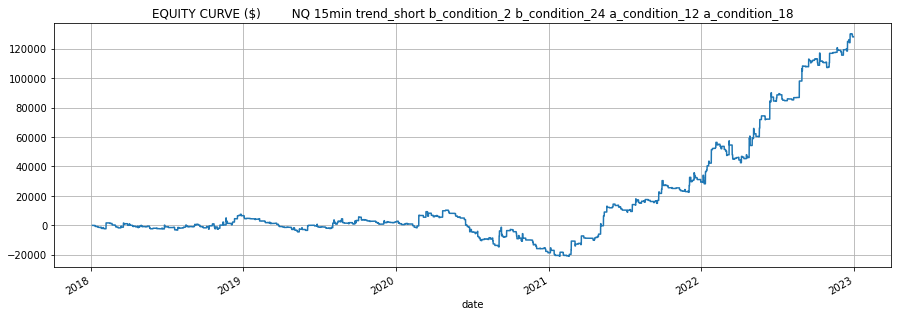

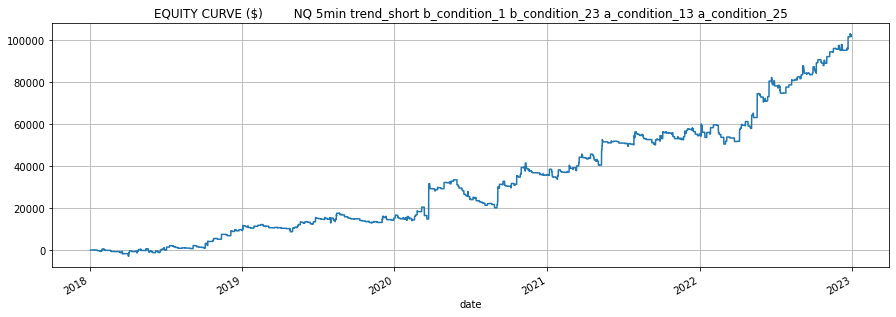

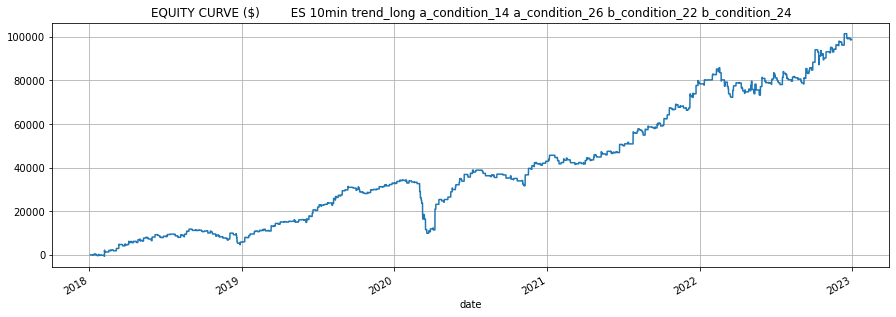

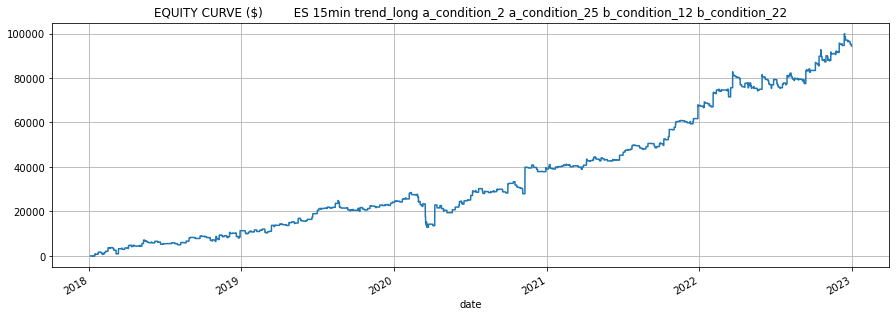

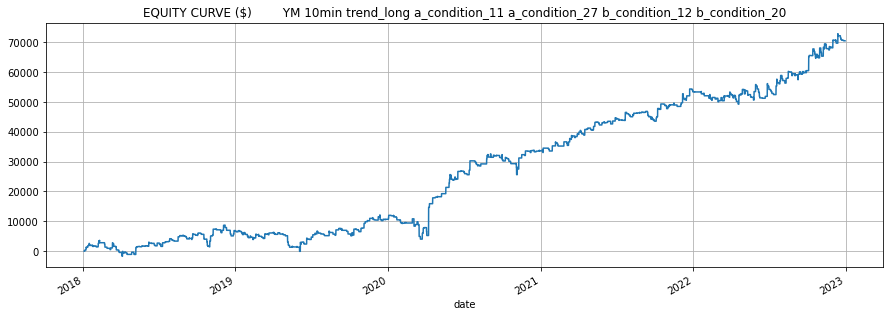

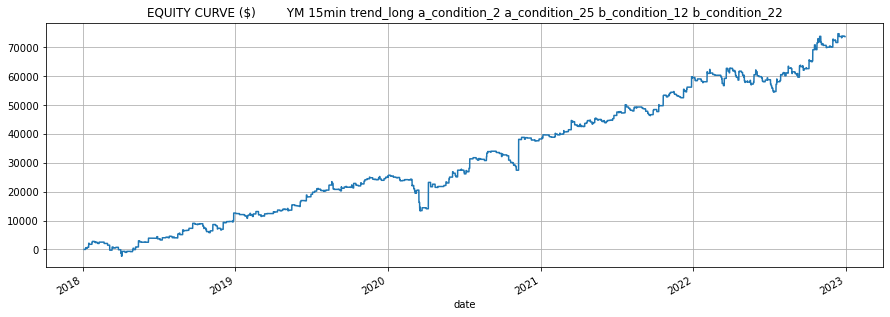

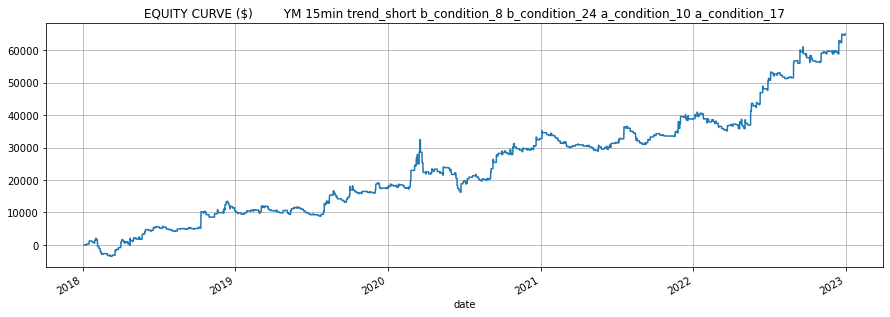

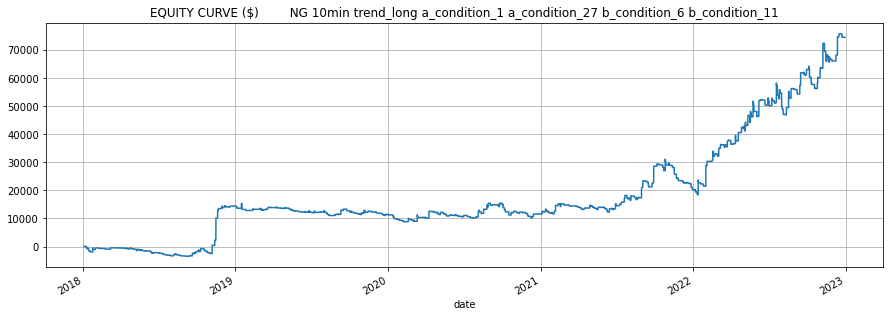

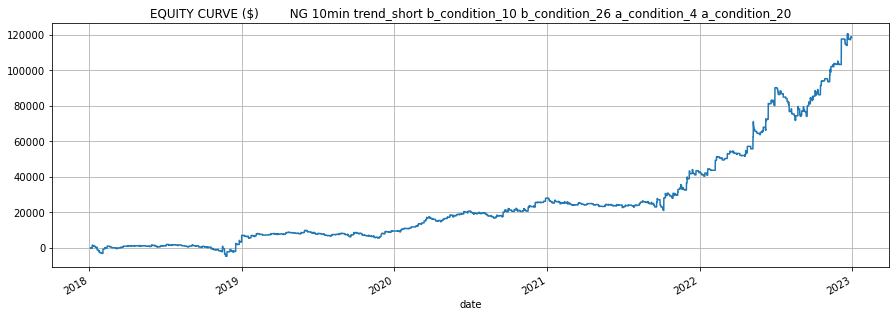

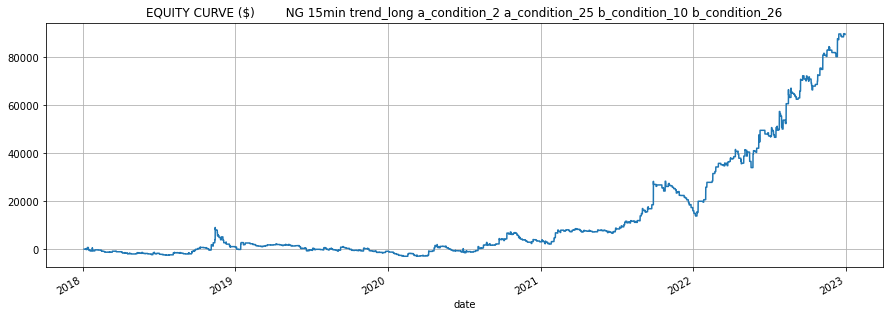

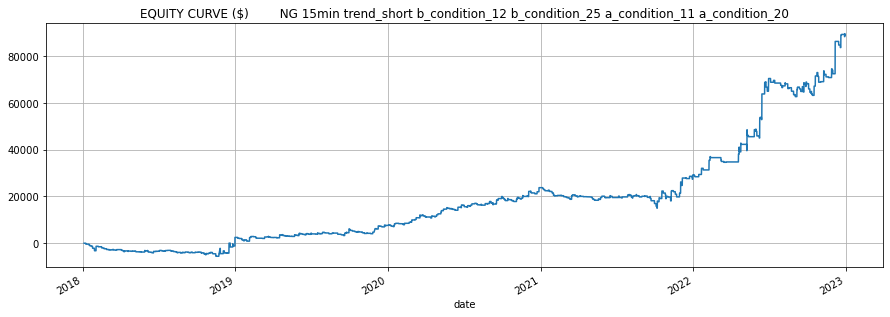

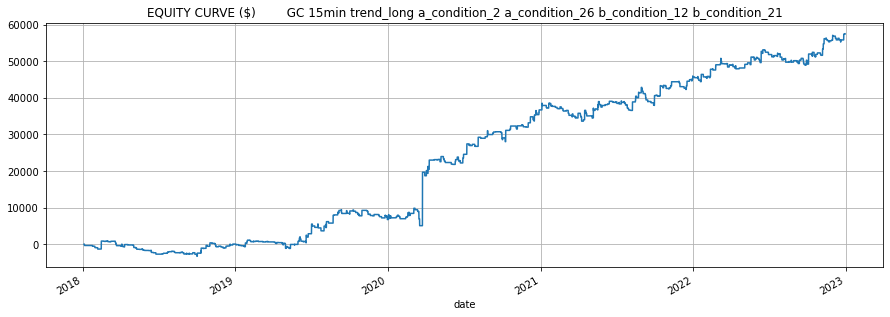

In [13]:
df_portfolio_ratios = pd.DataFrame()
df_portfolio_trades = pd.DataFrame()

# realizamos el backtest de cada estrategia del portfolio
for i in range(0, len(df_portfolio)):
    market = df_portfolio.market[i]
    point_value = point_value_df[point_value_df['market'] == market]['point_value'].values[0]
    timeframe = df_portfolio.timeframe[i]
    system_type = df_portfolio.system_type[i]
    in_condition_1 = df_portfolio.in_condition_1[i]
    in_condition_2 = df_portfolio.in_condition_2[i]
    out_condition_1 = df_portfolio.out_condition_1[i]
    out_condition_2 = df_portfolio.out_condition_2[i]

    df_data = get_ohlcv_data(market, timeframe, init_date, end_date)
    df_indicators = df_indicators_gen(df_data)
    df_indicators.to_pickle(v_path + 'trading_systems_' + market + '/'+ market +'_'+ timeframe + '_' + system_type + '_indicators__' + init_date + '--' + end_date + '.pkl')
    df_above_conditions, df_below_conditions = df_conditions_gen(df_indicators)
    df_conditions = pd.concat([df_above_conditions, df_below_conditions], axis=1)     # unificamos los df de condiciones
    df_conditions = df_conditions.loc[:,~df_conditions.columns.duplicated()]
    df_conditions.to_pickle(v_path + 'trading_systems_' + market + '/'+ market +'_'+ timeframe + '_' + system_type + '_conditions__' + init_date + '--' + end_date + '.pkl')

    df_ratios, df_bkt = detailed_backtest(market, point_value, timeframe, system_type, in_condition_1, in_condition_2, out_condition_1, out_condition_2, df_conditions)
    # guardamos df_bkt de cada estrategia
    df_bkt.to_pickle(v_path + 'trading_systems_' + market + '/'+ market +'_'+ timeframe + '_' + system_type + '__' + in_condition_1 + '_' +  in_condition_2 + '_' +  out_condition_1 + '_' +  out_condition_2 + '__bkt__' + init_date + '--' + end_date + '.pkl')

    # mostramos la curva de equity de cada estrategia en dolares
    df_bkt['cum_returns_dollars'].plot(figsize=(15, 5), title='EQUITY CURVE ($)        '+ market + ' ' + timeframe + ' ' + system_type + ' ' + in_condition_1 + ' ' + in_condition_2 + ' ' + out_condition_1 + ' ' + out_condition_2)
    plt.grid(True)
    plt.show()

    # mostramos la curva de equity de cada estrategia en porcentaje
    #df_bkt['cum_returns_pct'].plot(figsize=(15, 5), title='EQUITY CURVE (pct)        '+ market + ' ' + timeframe + ' ' + system_type + ' ' + in_condition_1 + ' ' + in_condition_2 + ' ' + out_condition_1 + ' ' + out_condition_2)
    #plt.grid(True)
    #plt.show()

    # concatenamos los df de ratios y trades para obtener un df con los ratios y trades de todo el portfolio
    df_portfolio_ratios = pd.concat([df_portfolio_ratios, df_ratios], axis=0)
    df_portfolio_trades = pd.concat([df_portfolio_trades, df_bkt], axis=0)
    
    

In [14]:
df_portfolio_ratios = df_portfolio_ratios.reset_index(drop=True)
df_portfolio_ratios

,market,timeframe,system_type,in_condition_1,in_condition_2,out_condition_1,out_condition_2,n_trades,profit_factor,bmo,net_profit,max_drawdown,n_wins,n_losses
0,NQ,15min,trend_short,b_condition_2,b_condition_24,a_condition_12,a_condition_18,727,1.413862,176.093535,128020.0,-31295.0,278,449
1,NQ,5min,trend_short,b_condition_1,b_condition_23,a_condition_13,a_condition_25,703,1.494281,144.772404,101775.0,-13345.0,282,421
2,ES,10min,trend_long,a_condition_14,a_condition_26,b_condition_22,b_condition_24,637,1.484294,155.200157,98862.5,-24512.5,284,353
3,ES,15min,trend_long,a_condition_2,a_condition_25,b_condition_12,b_condition_22,641,1.572664,147.230889,94375.0,-15625.0,290,351
4,YM,10min,trend_long,a_condition_11,a_condition_27,b_condition_12,b_condition_20,754,1.426283,93.527851,70520.0,-8810.0,293,461
5,YM,15min,trend_long,a_condition_2,a_condition_25,b_condition_12,b_condition_22,690,1.512043,106.753623,73660.0,-12325.0,306,384
6,YM,15min,trend_short,b_condition_8,b_condition_24,a_condition_10,a_condition_17,736,1.420367,88.362772,65035.0,-16230.0,285,451
7,NG,10min,trend_long,a_condition_1,a_condition_27,b_condition_6,b_condition_11,629,1.491973,118.394277,74470.0,-12640.0,227,402
8,NG,10min,trend_short,b_condition_10,b_condition_26,a_condition_4,a_condition_20,1019,1.552618,116.516192,118730.0,-18520.0,393,626
9,NG,15min,trend_long,a_condition_2,a_condition_25,b_condition_10,b_condition_26,826,1.514864,108.401937,89540.0,-14500.0,329,497


In [15]:
#df_portfolio_trades

In [16]:
trades_portfolio  = df_portfolio_trades.trades_closed_dollars
trades_portfolio = trades_portfolio[trades_portfolio != 0]
trades_portfolio

date
2018-01-08 02:45:00     -20.0
2018-01-09 09:15:00     -45.0
2018-01-10 18:45:00    -540.0
2018-01-12 08:15:00    -165.0
2018-01-17 10:15:00    -460.0
                        ...  
2022-12-20 00:45:00    -550.0
2022-12-20 07:30:00     170.0
2022-12-20 10:45:00     410.0
2022-12-27 11:15:00    1590.0
2022-12-30 02:45:00     110.0
Name: trades_closed_dollars, Length: 8597, dtype: float64

In [17]:
# calculamoas el net profit del portfolio
net_profit_portfolio = trades_portfolio.sum()
net_profit_portfolio

1061817.5

In [18]:
# calculamos el numero de trades, el net profit y bmo
portfolio_n_trades = len(trades_portfolio)
portfolio_net_profit = trades_portfolio.sum()
portfolio_bmo = portfolio_net_profit / portfolio_n_trades

print('nº de trades: ', portfolio_n_trades)
print('net profit: ', portfolio_net_profit)
print('bmo: ', portfolio_bmo)

nº de trades:  8597
net profit:  1061817.5
bmo:  123.51023612888217


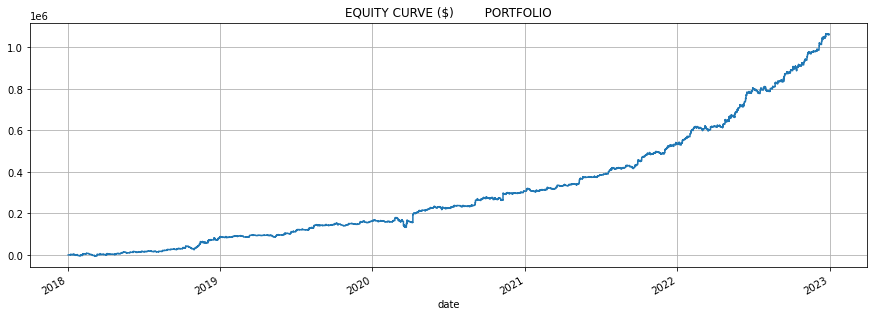

In [19]:
# dibujamos la curva de equity del portfolio
# primero ordenamos el df por fecha
df_portfolio_trades = df_portfolio_trades.sort_values(by=['date'])
df_portfolio_trades['cum_returns_dollars'] = df_portfolio_trades['trades_closed_dollars'].cumsum()

df_portfolio_trades['cum_returns_dollars'].plot(figsize=(15, 5), title='EQUITY CURVE ($)        PORTFOLIO')
plt.grid(True)
plt.show()